In [62]:
from sdtw import SoftDTW
from sdtw.barycenter import sdtw_barycenter
from sdtw.distance import SquaredEuclidean

import scipy.io as sio
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
from glob import glob
import json

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


sdtw_JLo26_0809_1_T2C1.json
sdtw_LilKim122_1203_1_T2C6.json
sdtw_Ariana21_0805_onepfive_2_T1C1.json
sdtw_Barbara63_0508_halfspeed_1_T2C3.json
sdtw_Biggie76_0703_gainmanip_rm1_1_T3C3.json
sdtw_Shakira112_0329_onepfivegain_1_T2C3.json
sdtw_Kesha55_1124_halfspeed_1_T2C1.json
sdtw_Rihanna38_1116_1_T1C1.json
sdtw_Barbara78_0522_zen_1_T2C2.json
sdtw_Beyonce139_1031_zen_1_T2C5.json
sdtw_LilKim118_1203_1_T2C2.json
sdtw_Aretha137_0818_1_T1C2.json
sdtw_Barbara51_0506_zen_1_T1C4.json
sdtw_Rihanna29_1111_onepfivegain_1_T2C3.json
sdtw_Shakira83_0318_1_T2C4.json
sdtw_Christina29_0828_1_T1C1.json
sdtw_Winehouse54_1121_halfspeed_2_T2C4.json
sdtw_Michelle148_0630_gainmanip_1_T1C3.json
sdtw_Meryl46_0411_gainmanip_1_T2C1.json
sdtw_Christina16_0825_onepfive_1_T1C1.json
sdtw_JLo19_0808_onepfive_2_T2C3.json
sdtw_Biggie64_0705_gainmanip_rm1_1_T1C7.json
sdtw_LilKim120_1203_onepfivegain_1_T2C4.json
sdtw_Shakira94_0321_onepfivegain_1_T2C5.json
sdtw_Aretha105_0810_halfspeed_1_T2C1.json
sdtw_Bjork64_0421_1_T2C1.j

sdtw_JLo30_0809_1_T2C5.json
sdtw_Biggie69_0705_gainmanip_rm1_1_T4C9.json
sdtw_Barbara85_0526_1_T1C2.json
sdtw_Winehouse22_1116_halfspeed_1_T1C1.json
sdtw_JLo29_0809_1_T2C4.json
sdtw_LilKim130_1205_halfspeed_1_T1C1.json
sdtw_Winehouse48_1120_onepfivegain_1_T2C1.json
sdtw_Erykah71_0723_1_T2C3.json
sdtw_Erykah51_0721_halfspeed_1_T2C1.json
sdtw_Winehouse36_1117_onepfivegain_1_T2C9.json
sdtw_LilKim135_1205_halfspeed_1_T2C4.json
sdtw_Ariana43_0817_1_T1C1.json
sdtw_LilKim50_1116_1_T1C1.json
sdtw_Christina22_0825_halfspeed_1_T2C3.json
sdtw_Barbara138_0617_1_T1C1.json
sdtw_Barbara56_0506_1_T1C9.json
sdtw_JLo29_0809_onepfive_1_T2C4.json
sdtw_Erykah137_0805_2_T2C1.json
sdtw_Erykah100_0730_1_T1C8.json
sdtw_Beyonce94_1015_2_T1C1.json
sdtw_Meryl41_0405_gainmanip_1_T8C1.json
sdtw_Aretha93_0806_1_T1C1.json
sdtw_Biggie69_0630_gainmanip_1_T4C9.json
sdtw_Ariana74_0901_halfspeed_1_T2C2.json
sdtw_Erykah135_0805_halfspeed_1_T1C2.json
sdtw_LilKim121_1203_halfspeed_1_T2C5.json
sdtw_Winehouse38_1117_1_T2C1.jso

sdtw_Beyonce51_0929_1_T2C3.json
sdtw_Rihanna45_1118_onepfivegain_1_T2C1.json
sdtw_Meryl38_0405_gainmanip_1_T7C1.json
sdtw_Fiona41_0304_halfspeed_1_T2C1.json
sdtw_LilKim46_1113_1_T2C2.json
sdtw_Beyonce114_1028_halfspeed_1_T2C2.json
sdtw_Beyonce6_0917_1_T2C2.json
sdtw_LilKim40_1113_1_T1C1.json
sdtw_LilKim37_1113_onepfivegain_1_T2C1.json
sdtw_LilKim51_1116_1_T1C2.json
sdtw_Aretha45_0717_1_T1C1.json
sdtw_Shakira64_0316_zen_1_T2C1.json
sdtw_Shakira19_0303_1_T1C4.json
sdtw_Christina21_0825_onepfive_1_T2C2.json
sdtw_JLo54_0829_halfspeed_1_T2C1.json
sdtw_Erykah69_0723_1_T2C1.json
sdtw_Meryl105_0506_gainmanip_1_T5C3.json
sdtw_JLo7_0805_halfspeed_1_T2C1.json
sdtw_Daenerys65_0318_onepfivegain_1_T1C1.json
sdtw_Daenerys53_0223_halfspeed_1_T2C1.json
sdtw_Beyonce52_0929_halfspeed_1_T1C6.json
sdtw_Bjork6_0224_2_T2C1.json
sdtw_Erykah52_0721_1_T2C2.json
sdtw_Rihanna38_1116_halfspeed_1_T1C1.json
sdtw_Kesha57_1124_halfspeed_1_T2C3.json
sdtw_Aretha117_0811_1_T2C3.json
sdtw_Beyonce47_0929_halfspeed_1_T1C4.j

sdtw_Daenerys24_0212_1_T1C1.json
sdtw_LilKim55_1116_1_T2C2.json
sdtw_LilKim93_1201_halfspeed_1_T2C3.json
sdtw_Biggie111_0713_gainmanip_rm1_1_T1C2.json
sdtw_Aretha108_0810_1_T2C4.json
sdtw_Fiona28_0226_onepfivegain_1_T2C4.json
sdtw_Barbara126_0610_zen_1_T1C6.json
sdtw_Beyonce111_1028_3_T1C2.json
sdtw_Barbara66_0509_zen_1_T2C6.json
sdtw_Aretha69_0730_1_T2C1.json
sdtw_Christina18_0825_halfspeed_1_T1C3.json
sdtw_Rihanna46_1119_1_T2C1.json
sdtw_Erykah128_0804_2_T1C2.json
sdtw_Kesha73_1203_halfspeed_1_T2C4.json
sdtw_Biggie65_0629_gainmanip_rm1_1_T1C8.json
sdtw_Biggie54_0705_gainmanip_rm1_1_T4C2.json
sdtw_Aretha115_0812_onepfivegain_1_T2C1.json
sdtw_Shakira79_0318_1_T1C5.json
sdtw_Fiona45_0305_halfspeed_1_T2C1.json
sdtw_Winehouse33_1117_halfspeed_1_T2C6.json
sdtw_Barbara22_0429_2_T1C3.json
sdtw_Biggie108_0712_gainmanip_rm1_1_T4C4.json
sdtw_Biggie121_0714_gainmanip_rm1_1_T4C3.json
sdtw_Biggie66_0703_gainmanip_rm1_1_T1C9.json
sdtw_Meryl36_0405_gainmanip_1_T5C1.json
sdtw_JLo38_0811_onepfive_1_T2

sdtw_LilKim32_1111_zen_1_T1C3.json
sdtw_Biggie74_0703_gainmanip_rm1_1_T3C1.json
sdtw_Winehouse17_1112_halfspeed_1_T1C1.json
sdtw_Christina9_0816_1_T1C3.json
sdtw_Shakira76_0318_onepfivegain_1_T1C2.json
sdtw_Kesha63_1202_1_T2C1.json
sdtw_Ariana27_0808_1_T2C3.json
sdtw_JLo38_0811_1_T2C1.json
sdtw_Beyonce47_0929_zen_1_T1C4.json
sdtw_Christina17_0825_1_T1C2.json
sdtw_Kesha64_1202_halfspeed_1_T2C2.json
sdtw_Barbara87_0526_1_T2C2.json
sdtw_Barbara27_0430_1_T2C1.json
sdtw_Kesha56_1124_halfspeed_1_T2C2.json
sdtw_Beyonce102_1022_1_T1C1.json
sdtw_Kesha70_1204_halfspeed_1_T2C1.json
sdtw_Michelle197_0710_gainmanip_rm1_1_T2C1.json
sdtw_Barbara67_0511_halfspeed_1_T1C1.json
sdtw_Biggie100_0710_gainmanip_rm1_2_T3C4.json
sdtw_Fiona45_0305_onepfivegain_1_T2C1.json
sdtw_LilKim148_1208_1_T2C1.json
sdtw_Aretha72_0731_1_T1C1.json
sdtw_Ariana40_0815_halfspeed_1_T2C2.json
sdtw_LilKim118_1203_onepfivegain_1_T2C2.json
sdtw_Biggie68_0703_gainmanip_rm1_1_T4C8.json
sdtw_Gerald1_0227_gainmanip_1_T1C1.json
sdtw_Beyo

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


sdtw_Winehouse51_1120_onepfivegain_1_T2C4.json
sdtw_Fiona42_0304_onepfivegain_1_T1C3.json
sdtw_Daenerys35_0215_onepfivegain_1_T1C5.json
sdtw_Erykah131_0804_2_T2C2.json
sdtw_Winehouse40_1117_onepfivegain_1_T1C7.json
sdtw_Kesha59_1124_zen_1_T1C1.json
sdtw_Beyonce98_1015_2_T2C2.json
sdtw_Winehouse23_1116_halfspeed_1_T1C2.json
sdtw_Ariana26_0808_1_T2C2.json
sdtw_Christina23_0826_onepfive_1_T1C1.json
sdtw_JLo19_0808_2_T2C3.json
sdtw_Christina8_0816_1_T1C2.json
sdtw_Shakira58_0315_onepfivegain_1_T1C1.json
sdtw_Beyonce117_1028_halfspeed_1_T2C5.json
sdtw_Beyonce53_0929_zen_1_T1C7.json
sdtw_Shakira42_0310_1_T1C1.json
sdtw_Aretha60_0721_1_T2C3.json
sdtw_Erykah95_0730_1_T1C3.json
sdtw_Ariana21_0805_halfspeed_1_T1C1.json
sdtw_Shakira12_0302_halfspeed_1_T1C2.json
sdtw_Kesha59_1124_halfspeed_1_T1C1.json
sdtw_Shakira110_0329_onepfivegain_1_T2C1.json
sdtw_Daenerys53_0223_1_T2C1.json
sdtw_Christina8_0816_halfspeed_1_T1C2.json
sdtw_Shakira92_0321_halfspeed_1_T2C3.json
sdtw_LilKim152_1209_halfspeed_1_T1C

sdtw_Kesha71_1203_halfspeed_1_T2C2.json
sdtw_Erykah51_0721_1_T2C1.json
sdtw_Madonna18_0325_1_T1C1.json
sdtw_Beyonce118_1028_halfspeed_1_T2C6.json
sdtw_Barbara65_0508_halfspeed_1_T2C5.json
sdtw_LilKim155_1209_1_T1C5.json
sdtw_Daenerys36_0215_onepfivegain_1_T1C6.json
sdtw_Barbara124_0605_halfspeed_1_T2C2.json
sdtw_Fiona45_0305_1_T2C1.json
sdtw_Meryl62_0417_gainmanip_1_T1C2.json
sdtw_Biggie108_0713_gainmanip_rm1_1_T4C4.json
sdtw_Biggie121_0715_gainmanip_rm1_1_T4C3.json
sdtw_Daenerys52_0223_halfspeed_1_T1C1.json
sdtw_Shakira86_0321_onepfivegain_1_T1C3.json
sdtw_Ariana14_0802_1_T1C1.json
sdtw_Erykah25_0716_1_T1C5.json
sdtw_Aretha109_0810_1_T2C5.json
sdtw_Bjork24_0305_onepfivegain_2_T2C3.json
sdtw_Beyonce49_0929_halfspeed_1_T2C1.json
sdtw_JLo20_0808_onepfive_2_T2C4.json
sdtw_Kesha54_1123_1_T2C1.json
sdtw_Michelle207_0712_gainmanip_rm1_1_T2C5.json
sdtw_Winehouse30_1117_onepfivegain_1_T1C6.json
sdtw_Beyonce5_0917_1_T2C1.json
sdtw_Meryl47_0411_gainmanip_1_T2C2.json
sdtw_Shakira81_0318_1_T2C2.js

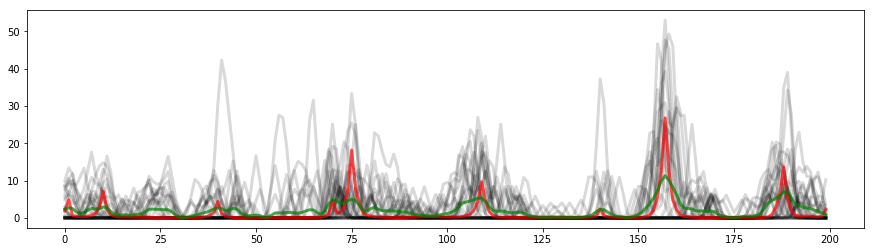

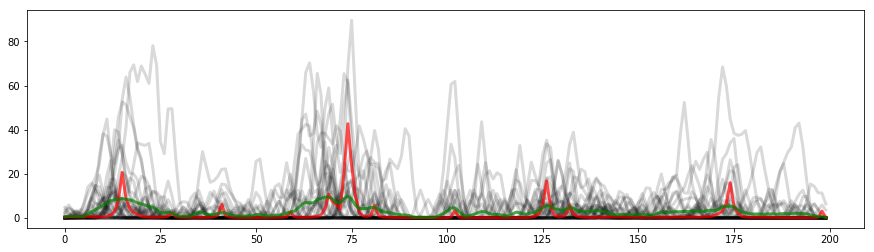

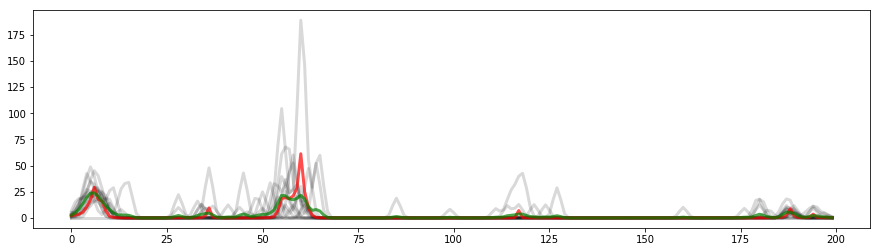

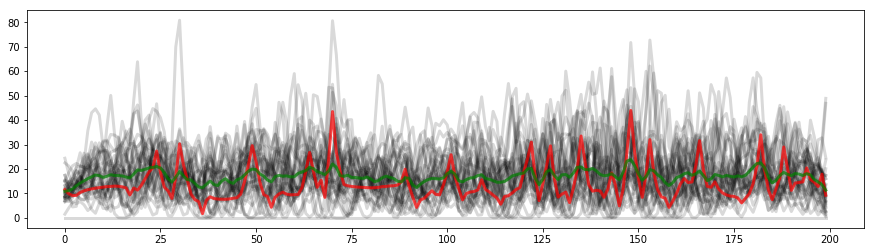

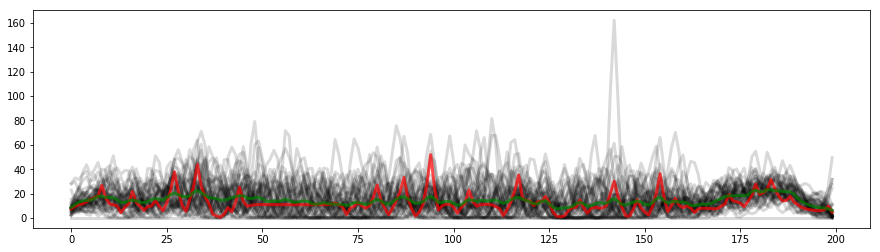

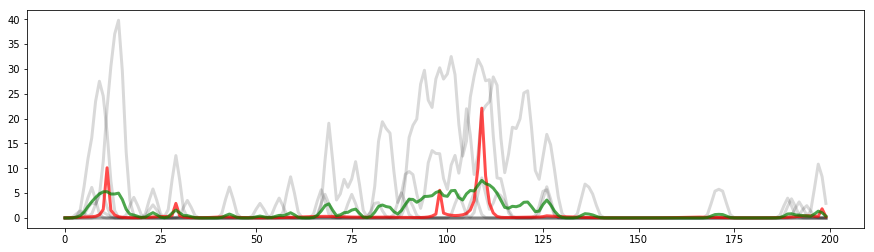

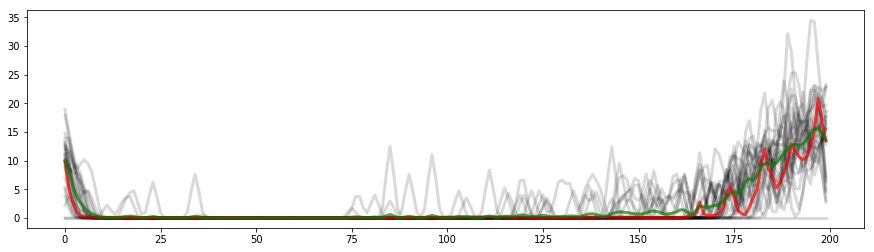

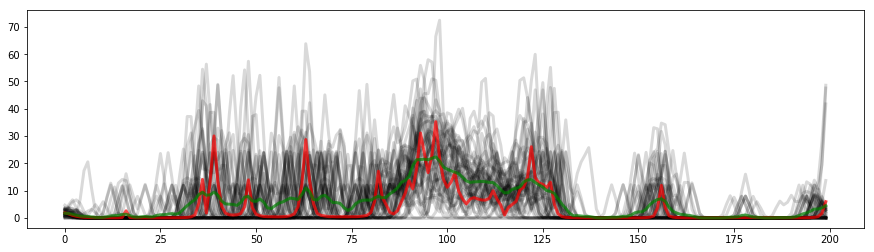

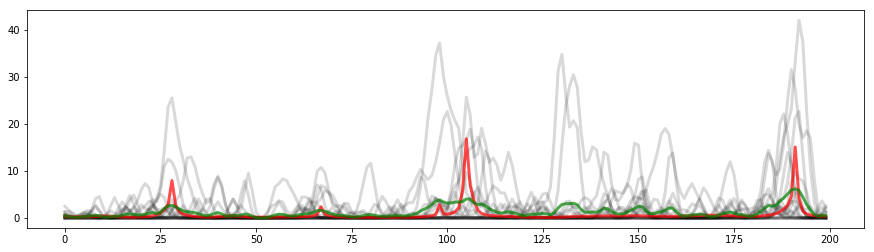

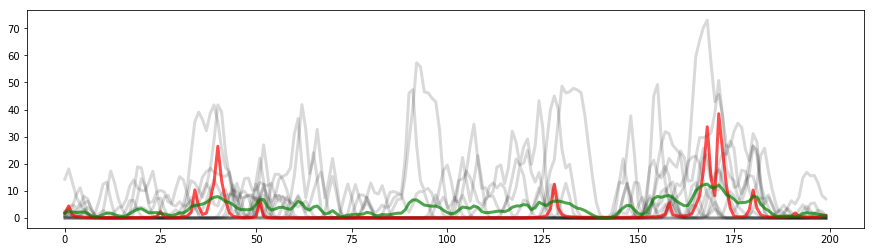

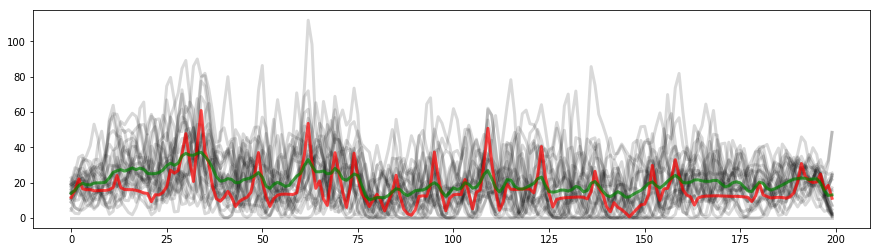

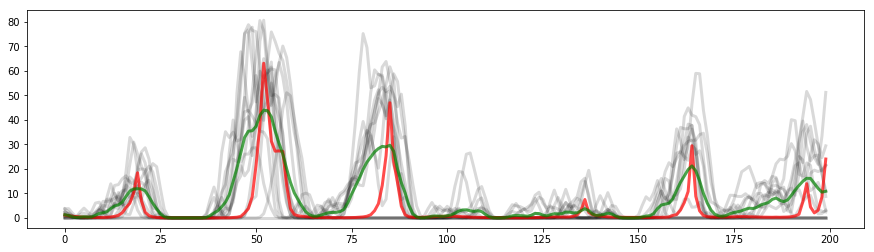

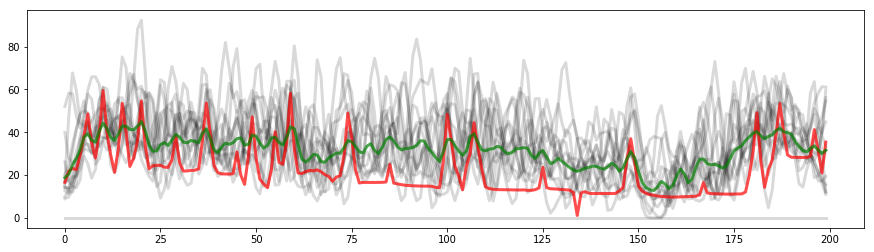

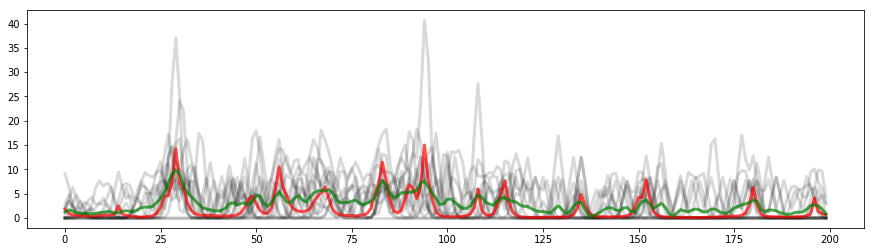

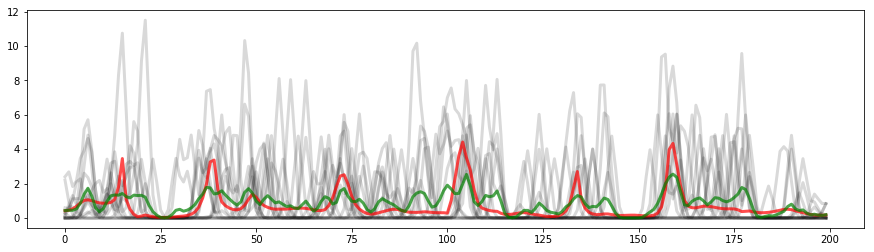

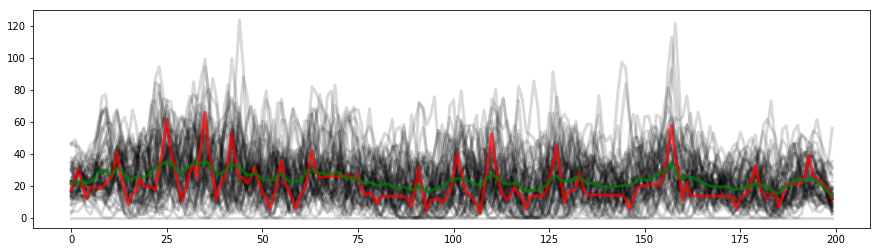

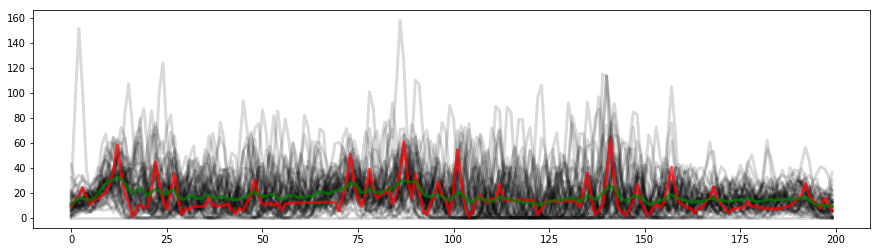

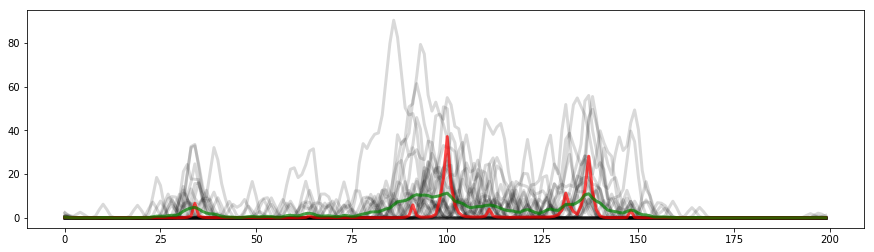

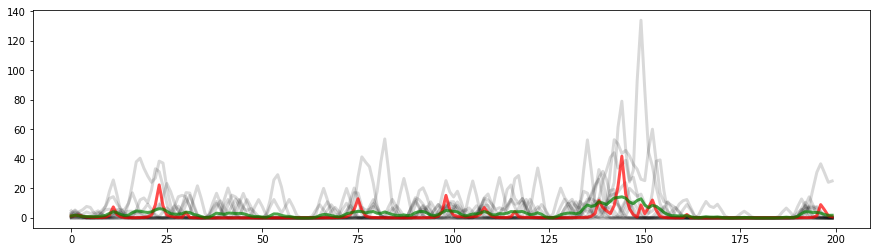

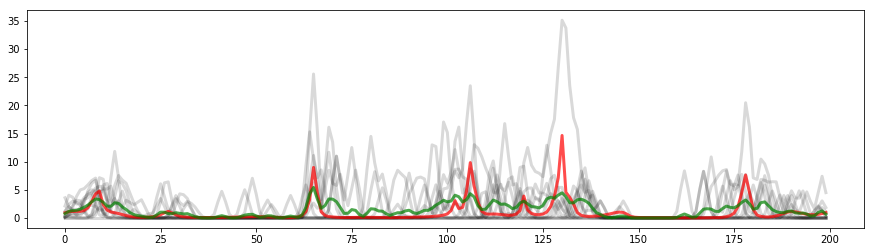

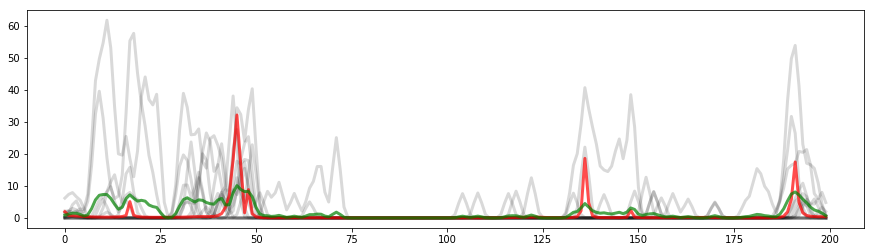

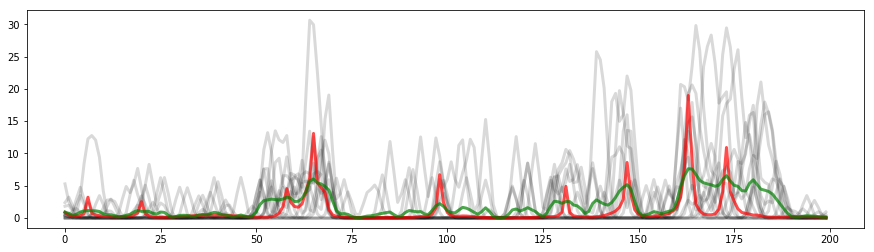

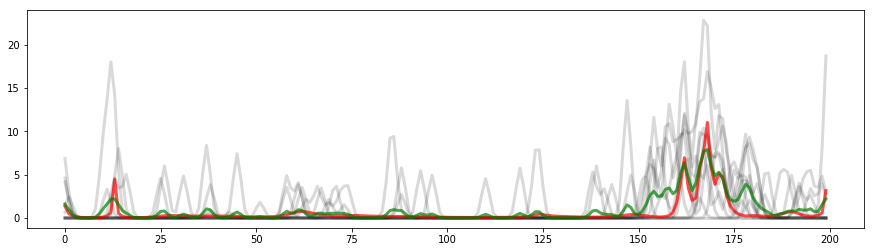

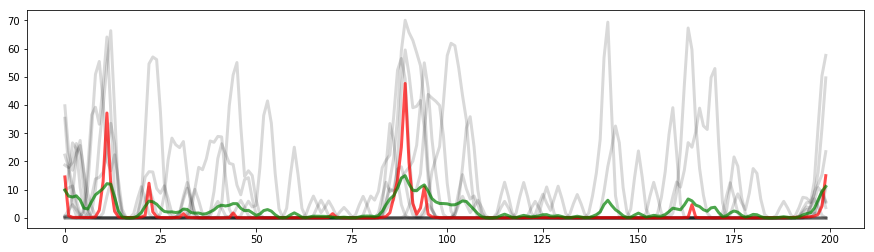

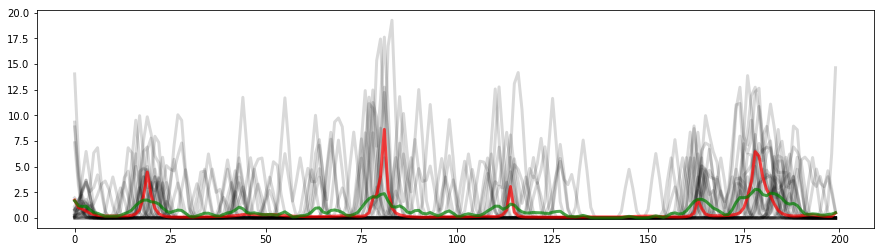

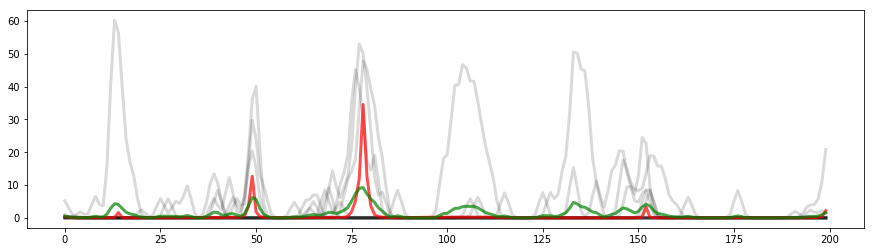

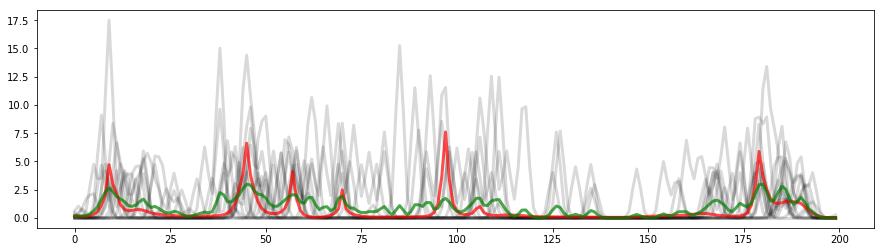

In [56]:
baseDir = "/Users/markplitt/Dropbox/Malcolms_VR_data/twPCA_Mats/"
files = glob(baseDir+"twPCA_*.mat")
cell_suffix = [i.split(baseDir+"twPCA_")[1] for i in files]
cell_suffix = [i.split(".mat")[0] for i in cell_suffix]


for i, f  in enumerate(files):
    
    matDat = sio.loadmat(f)
    spikeMat = np.expand_dims(gaussian_filter1d(matDat['timeSpikeMat'],10,axis = 1),axis=2)
    spikeMat[np.isnan(spikeMat)]=0.
    frMat = np.expand_dims(matDat['frTrialMat'],axis=2)
    
    
    binit_fr = frMat.mean(axis=0)
    fr_bc = sdtw_barycenter(frMat, binit_fr, gamma=10)
    
    #binit_sp = spikeMat.mean(axis=0)
    #sp_bc = sdtw_barycenter(spikeMat,binit_sp,gamma=10)
    
    
    data = {'firing_rate_mean_warp':fr_bc.tolist()} #,'smoothed_spikes_mean_warp':sp_bc.tolist()}
    print("sdtw_"+cell_suffix[i]+".json")
    with open(baseDir+ "sdtw_"+cell_suffix[i]+".json",'w') as j:
        json.dump(data,j)
    
    
    if mod(i,50) == 0:
        figure(figsize=(15,4))
        for x in frMat:
            plot(x.ravel(), c="k", linewidth=3, alpha=0.15)
        
        plot(fr_bc.ravel(), c="r", linewidth=3, alpha=0.7)
        plot(frMat.mean(axis=0),c='g',linewidth=3,alpha=.7)
    

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


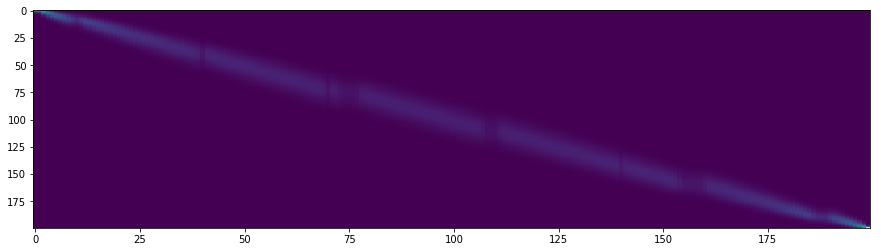

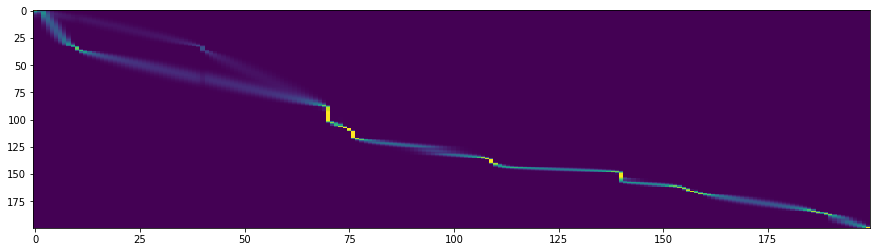

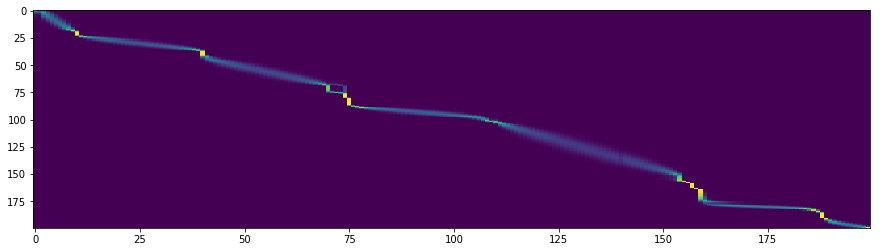

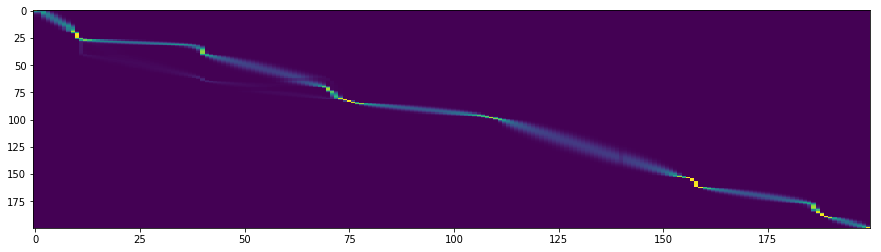

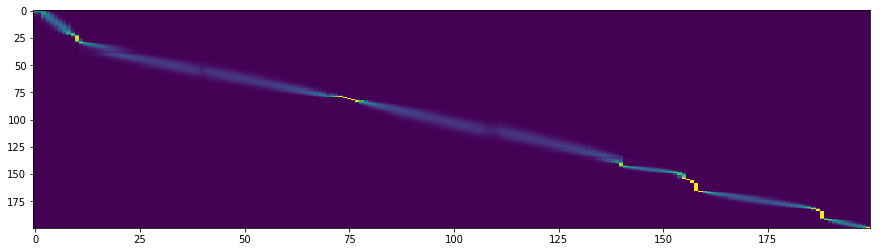

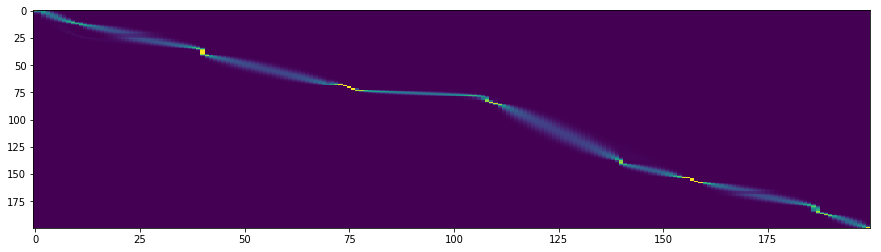

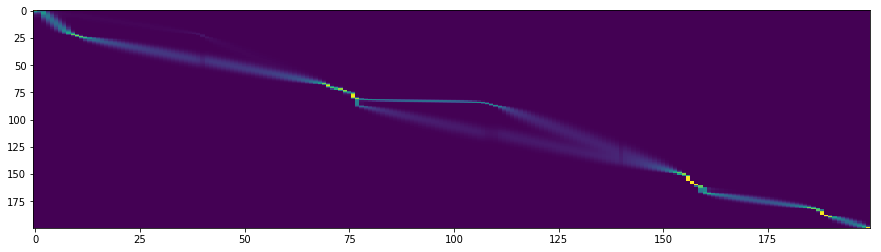

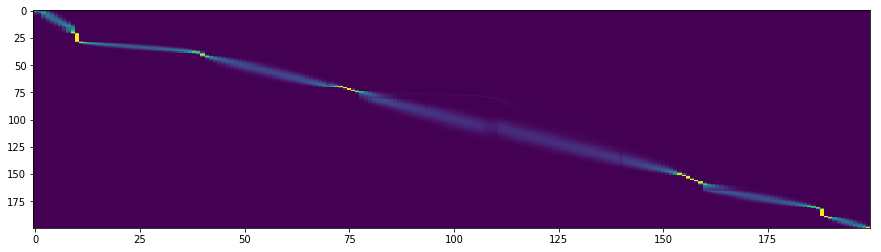

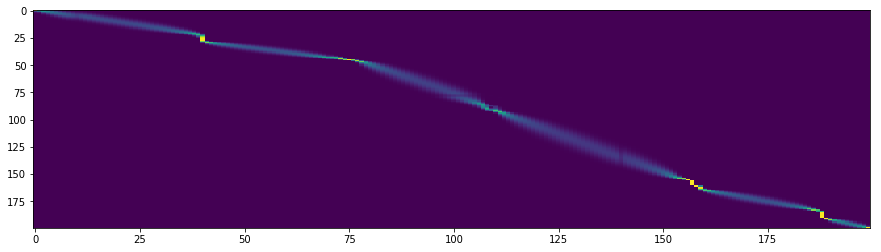

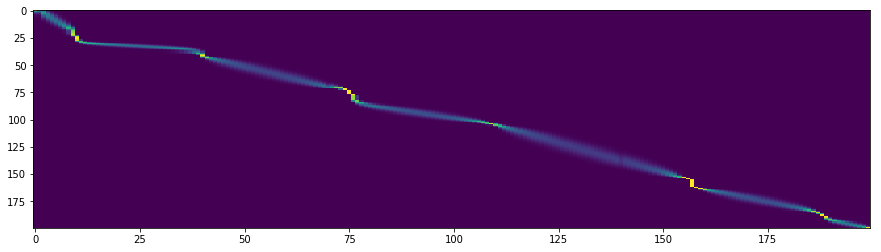

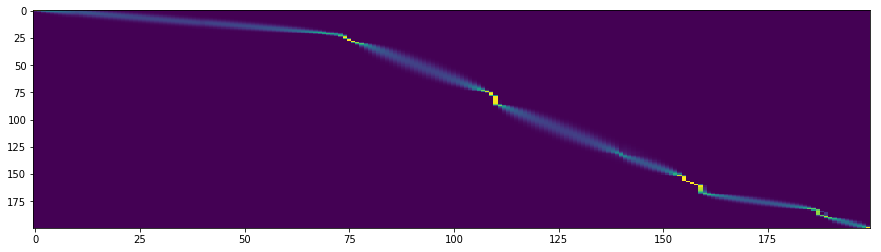

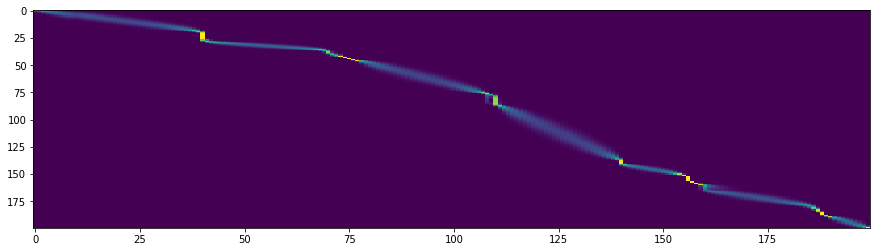

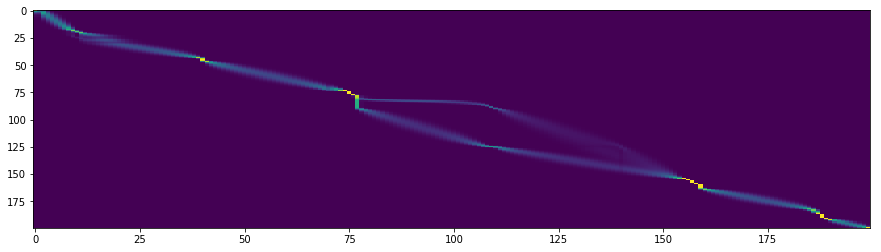

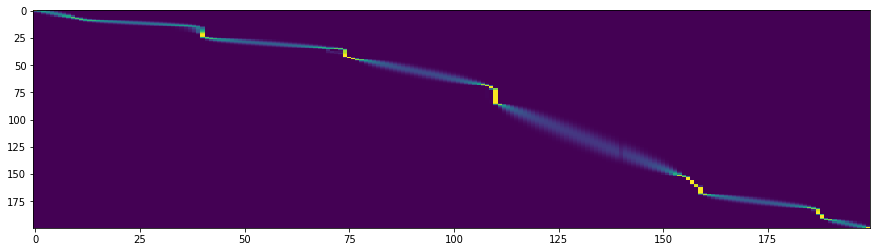

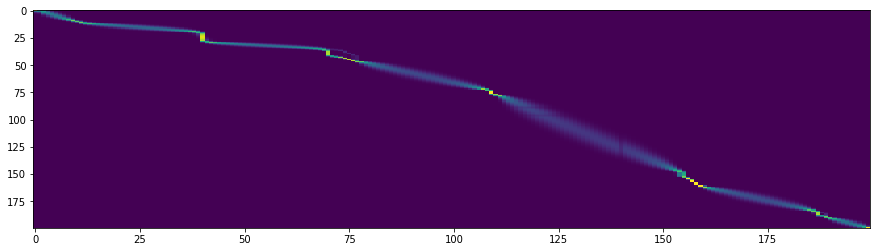

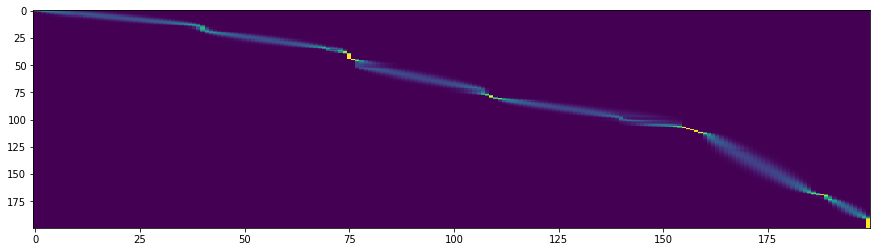

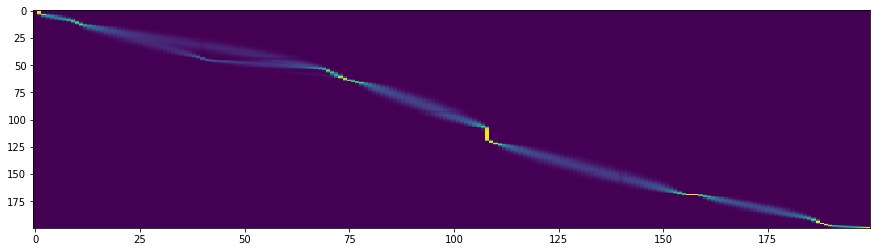

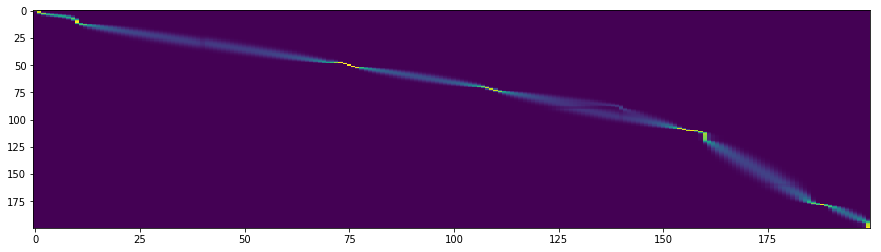

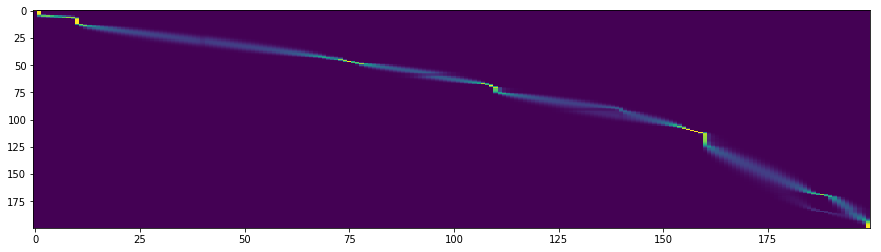

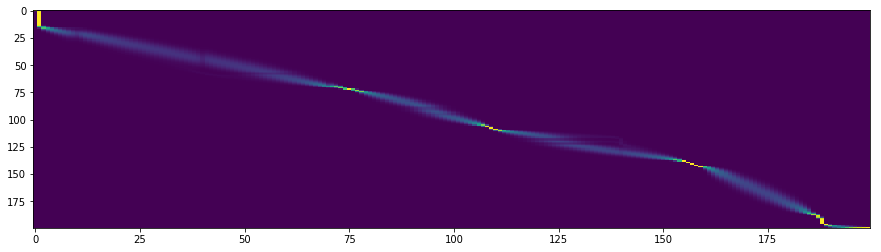

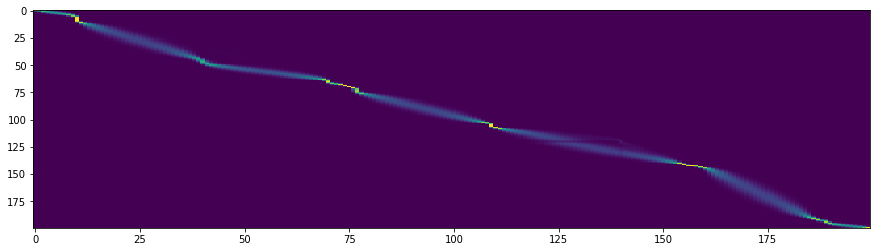

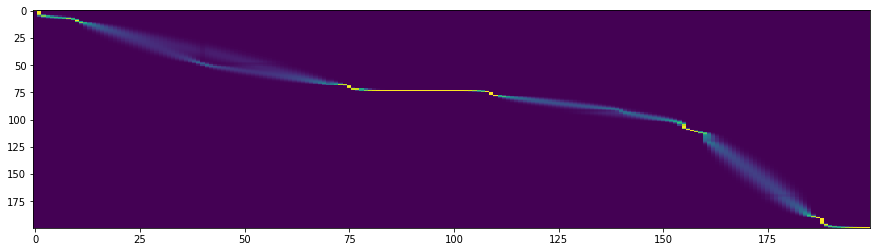

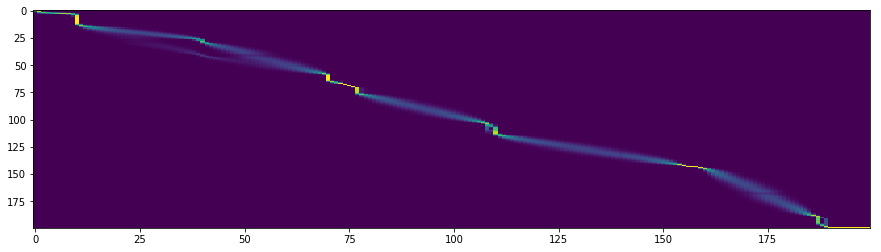

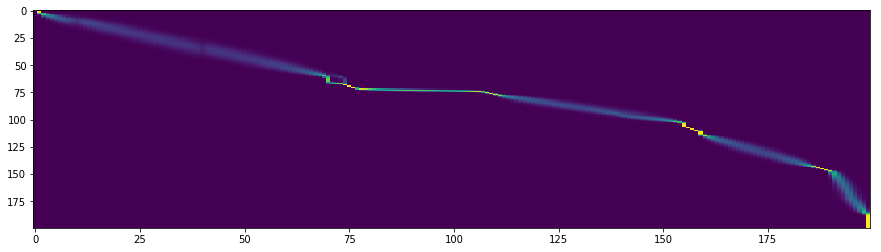

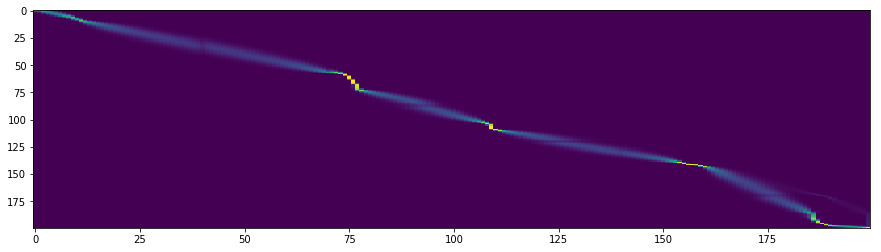

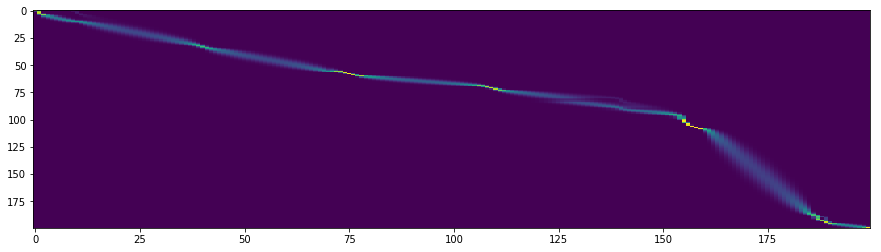

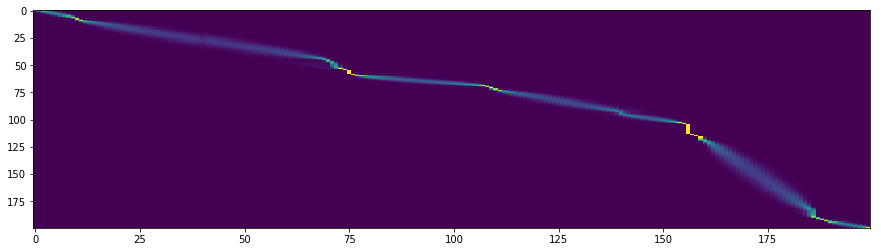

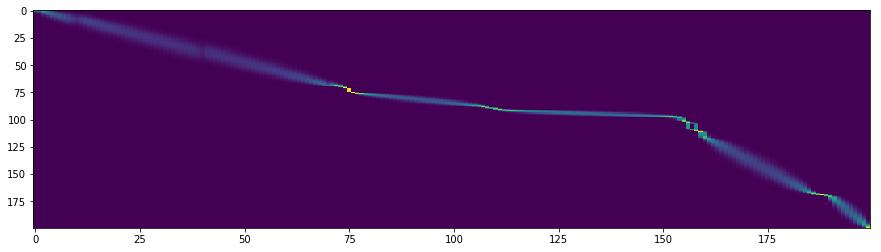

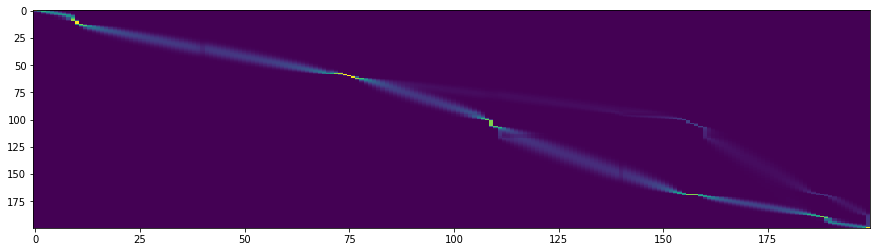

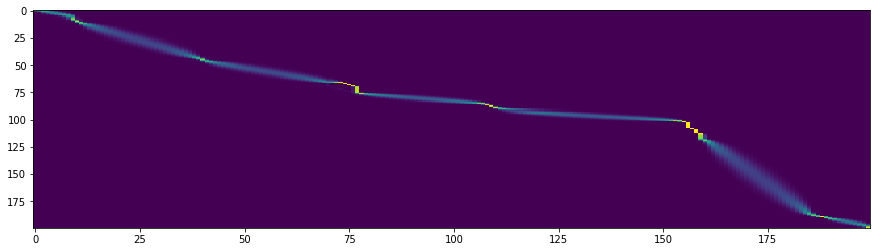

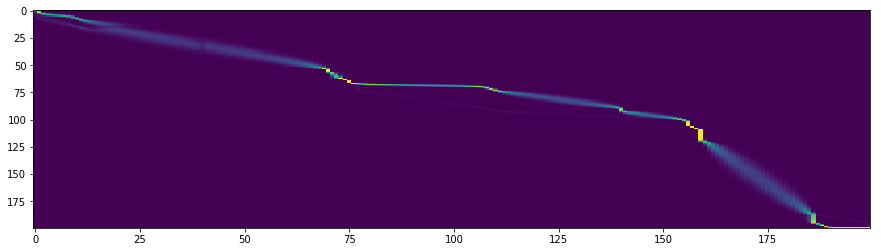

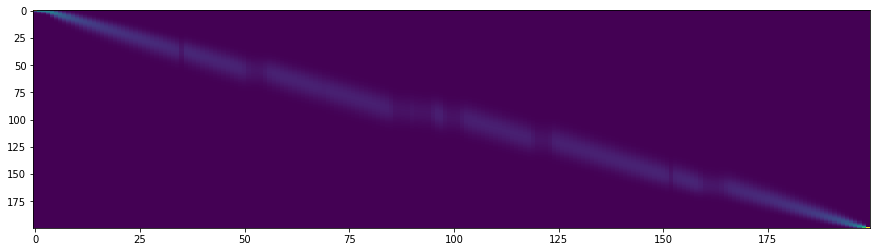

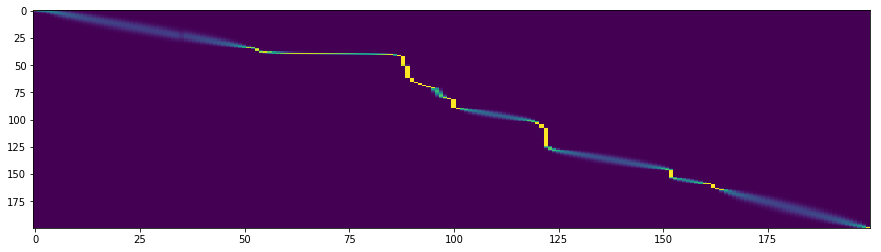

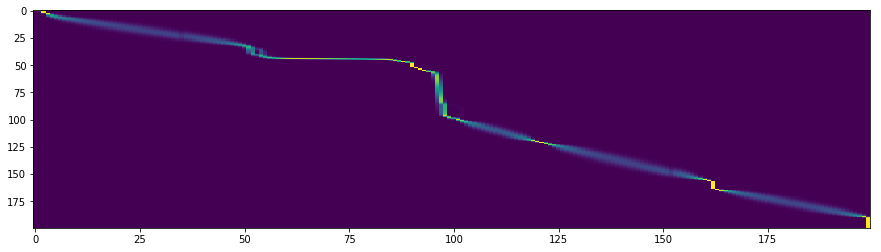

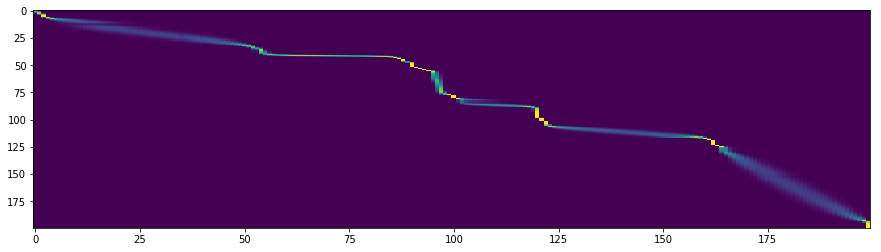

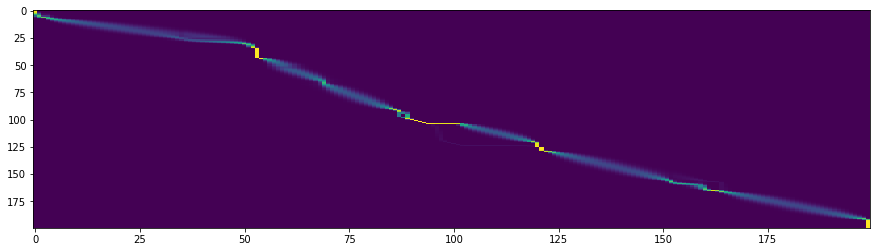

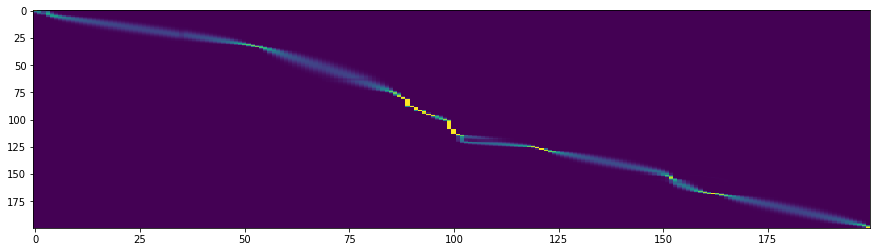

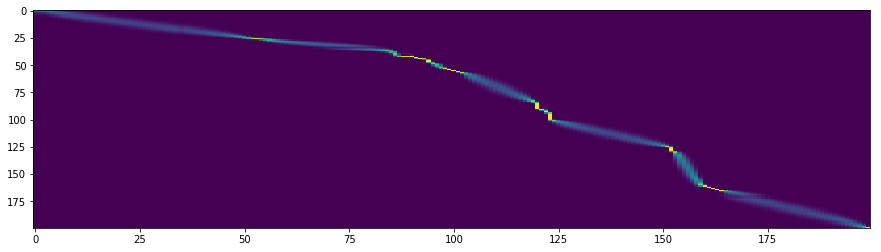

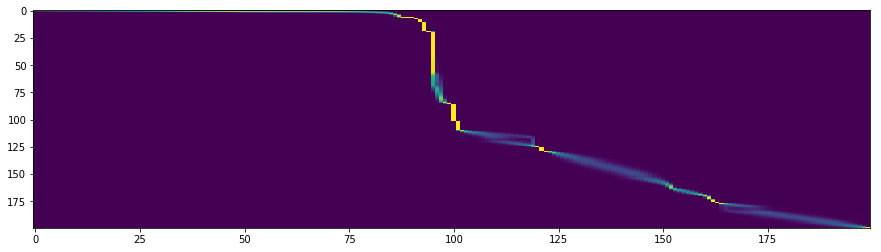

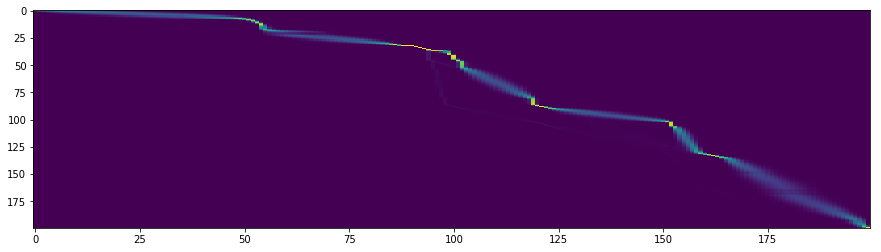

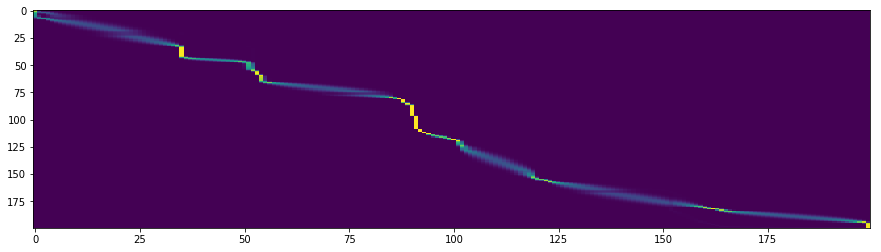

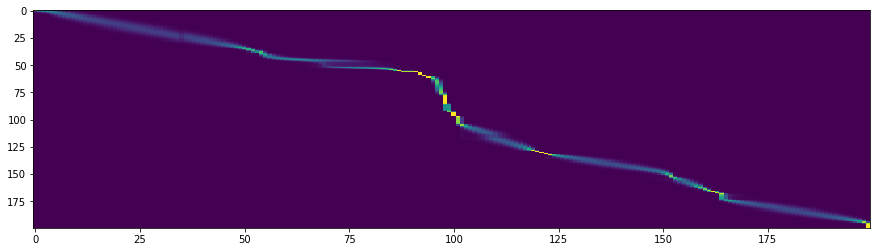

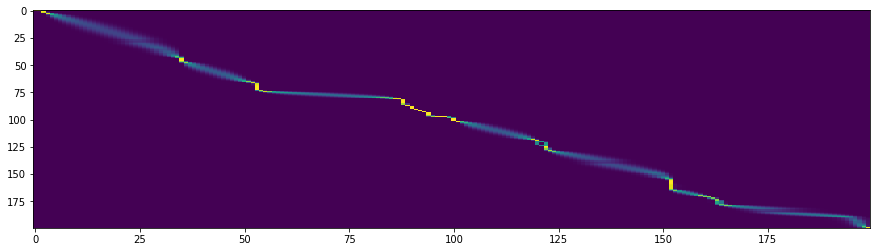

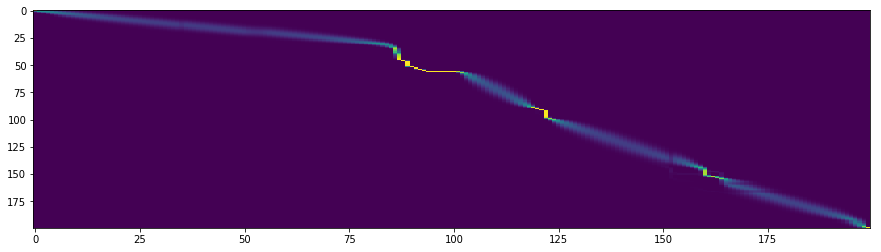

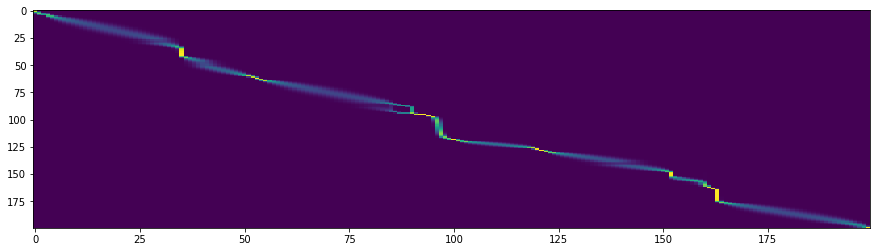

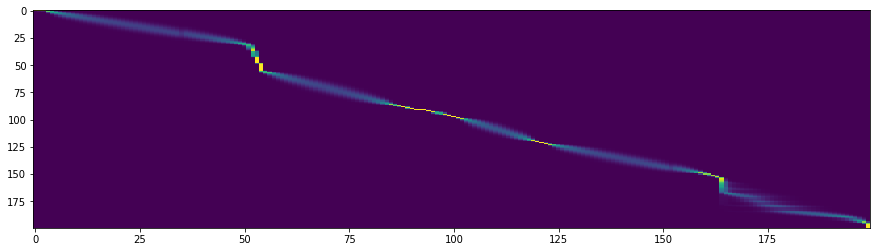

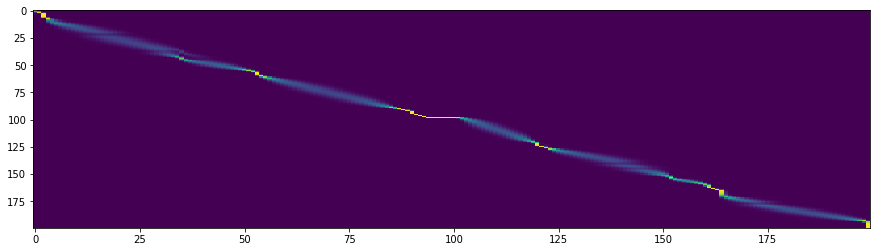

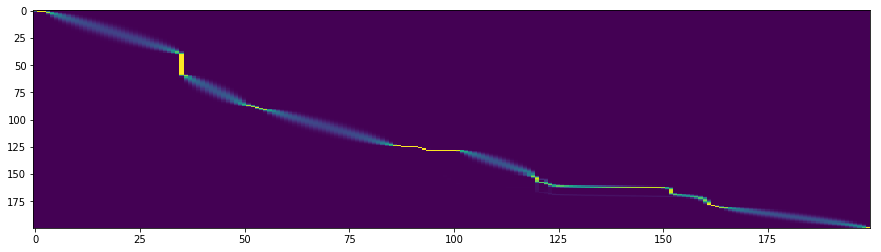

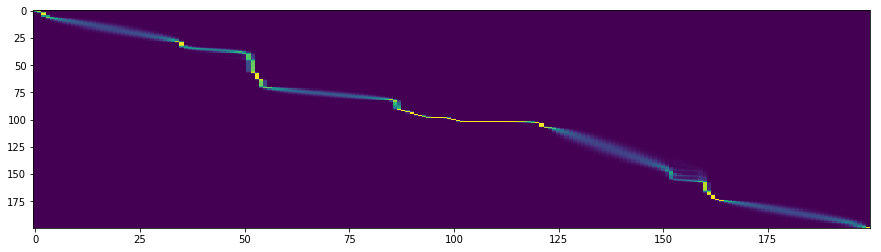

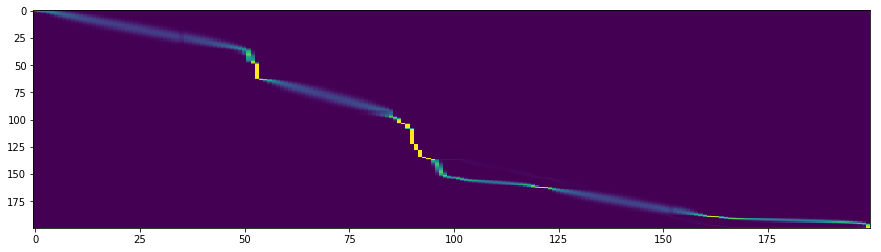

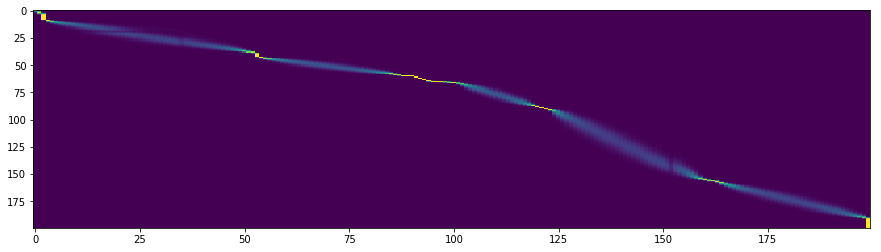

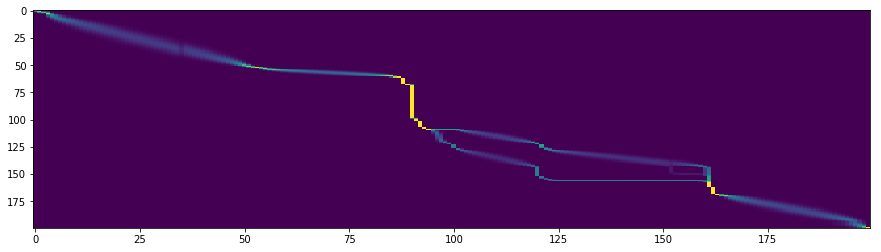

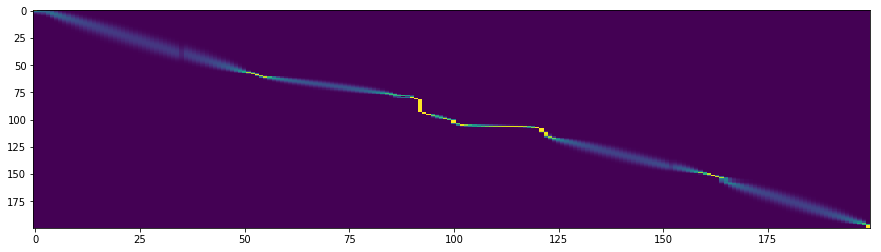

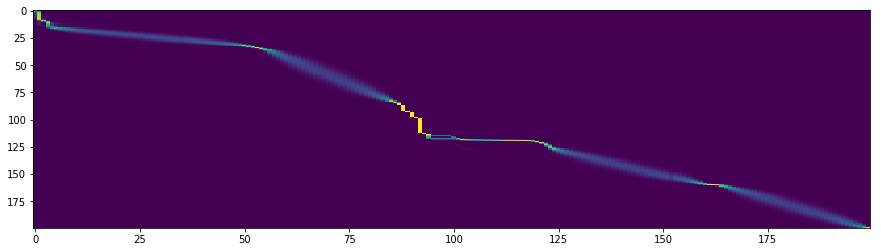

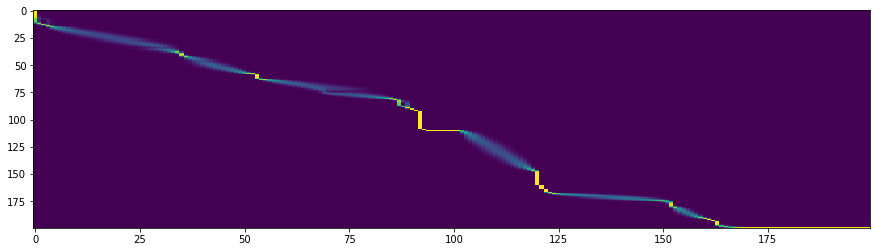

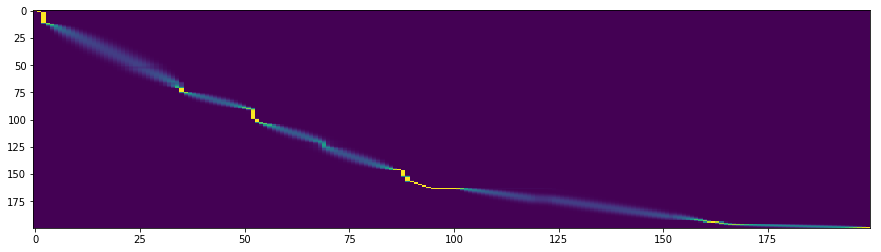

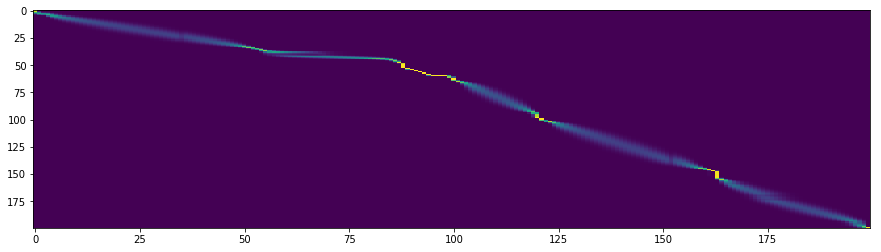

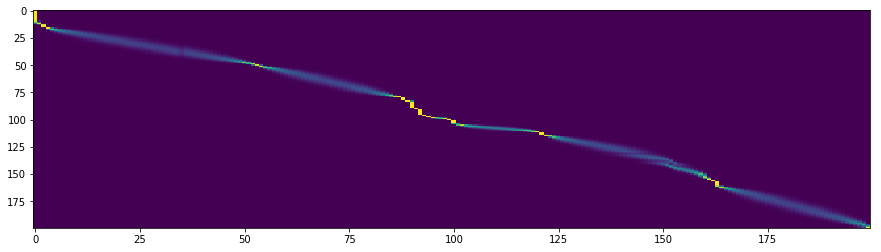

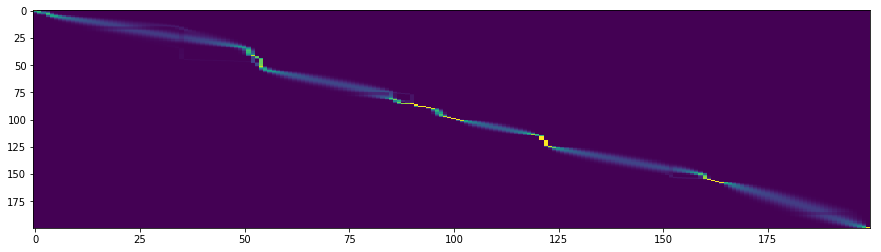

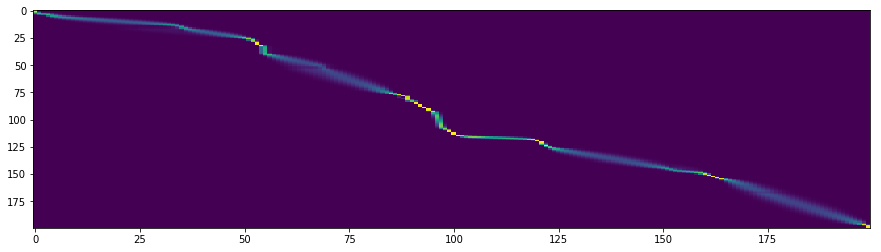

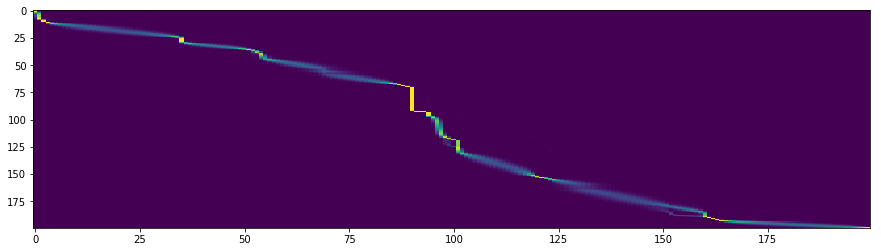

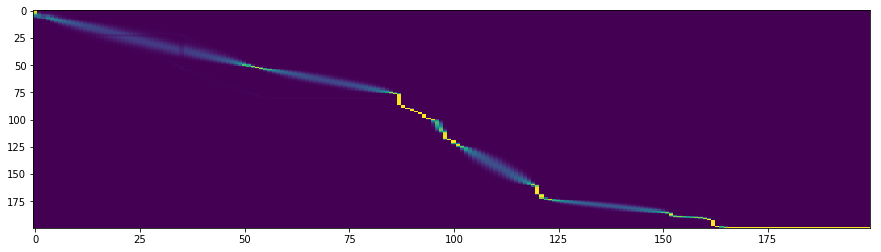

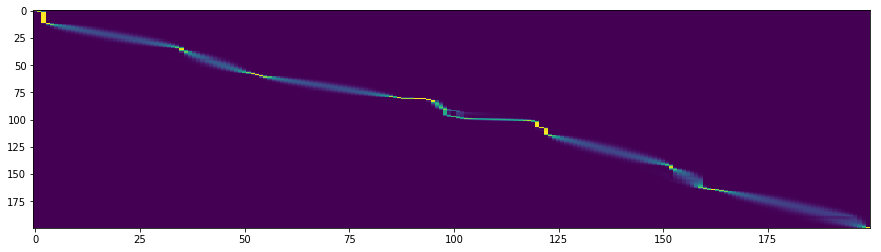

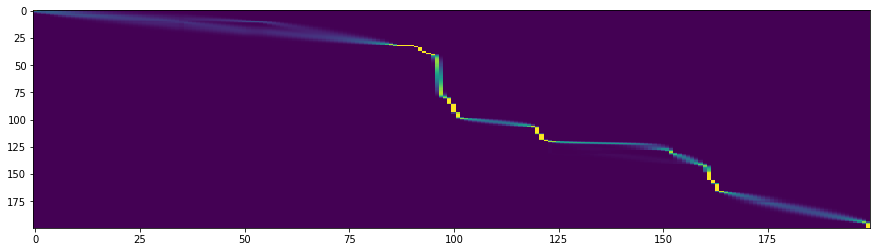

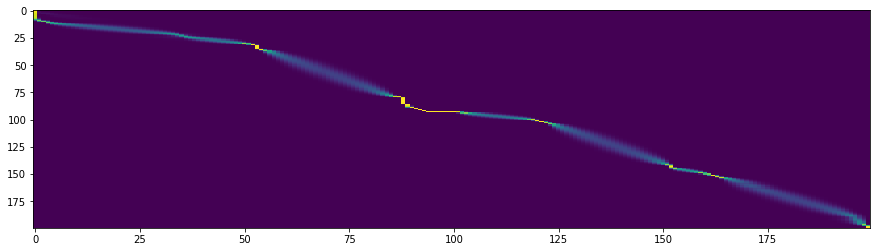

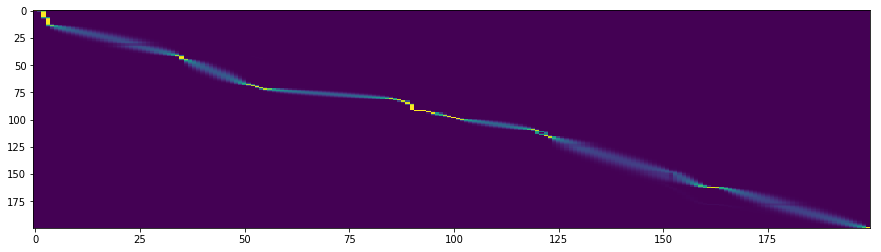

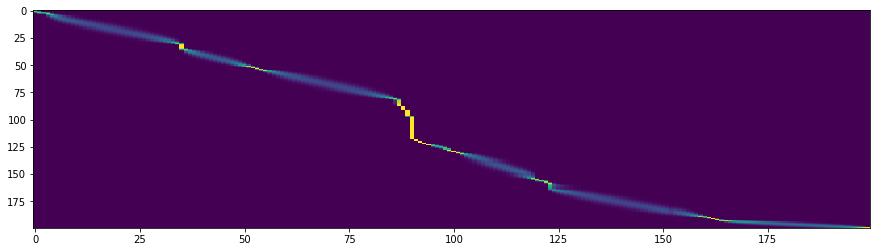

In [64]:

params = sio.loadmat(baseDir+"params.mat")
params.keys()
grid_fnames = [params['grid_fnames'][i][0][0] for i,f in enumerate(params['grid_fnames'])]
border_fnames = [params['border_fnames'][i][0][0] for i,f in enumerate(params['border_fnames'])]

for i, f  in enumerate(files[0:2]):
    
    # load barry center
    with open(baseDir+ "sdtw_"+cell_suffix[i]+".json",'r') as j:
        data = json.load(j)
        
        
    fr_bc =  np.array(data['firing_rate_mean_warp'])
    
    
    # compute alignment to barry center
    trialDat = sio.loadmat(f)
    frMat = np.expand_dims(trialDat['frTrialMat'],axis=2)
    
    for x in frMat:
        D = SquaredEuclidean(x, fr_bc)
        sdtw = SoftDTW(D, gamma=10.0)
        val = sdtw.compute()
        # gradient w.r.t. D, shape = [m, n], which is also the expected alignment matrix
        E = sdtw.grad()
        
        figure(figsize=(15,4))
        imshow(np.squeeze(E),aspect = 'auto')
# apply transform to spike rasters

In [18]:
baseDir = "/Users/markplitt/Dropbox/Malcolms_VR_data/twPCA_Mats/"
params = sio.loadmat(baseDir+"params.mat")
params.keys()
for i, arr in enumerate(params['grid_fnames']):
    params['grid_fnames'][i]= params['grid_fnames'][i][0][0]
    # load all grid cell data in dictionary 

    
spikeMats, frMats = [],[]
for i, fname in enumerate(params['grid_fnames']):
    matDat = sio.loadmat(baseDir+fname[0])
    #print(matDat.keys())
    spikeMats.append(gaussian_filter1d(matDat['timeSpikeMat'],10,axis = 1))
    frMats.append(matDat['frTrialMat'])
    

In [7]:
matDat = sio.loadmat(baseDir+fname[0])
matDat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'frTrialMat', 'posMat', 'timeSpikeMat'])

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

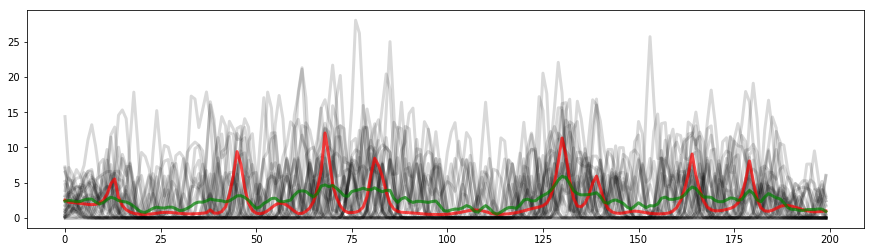

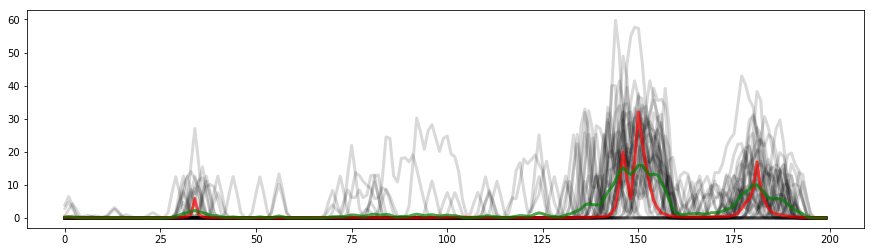

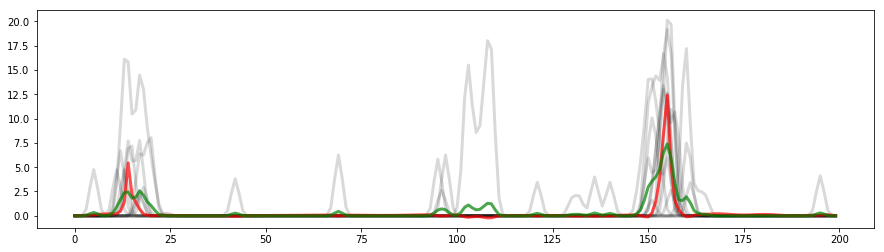

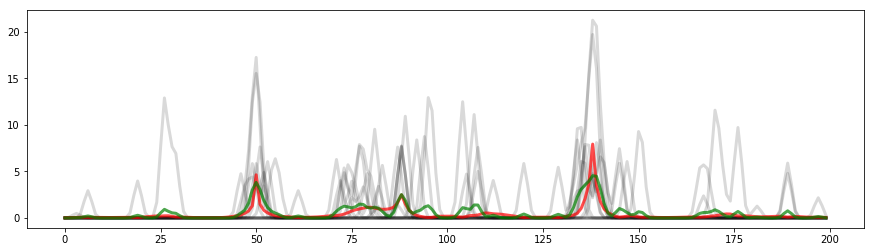

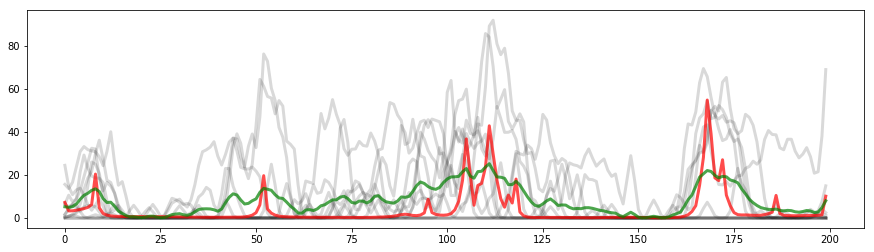

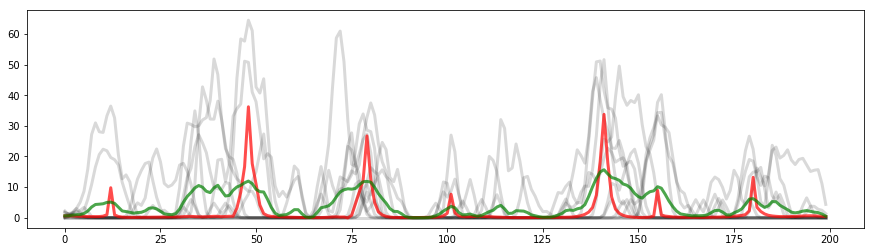

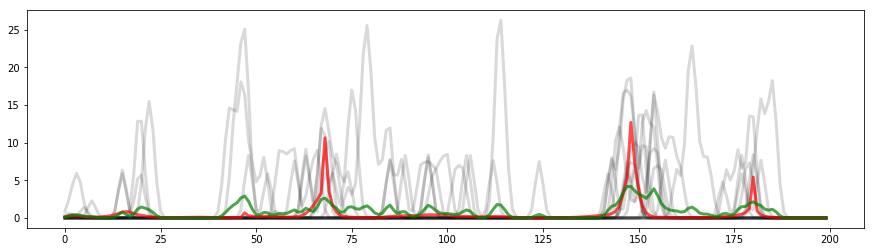

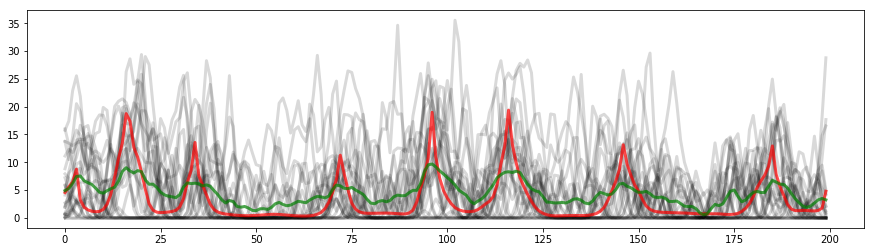

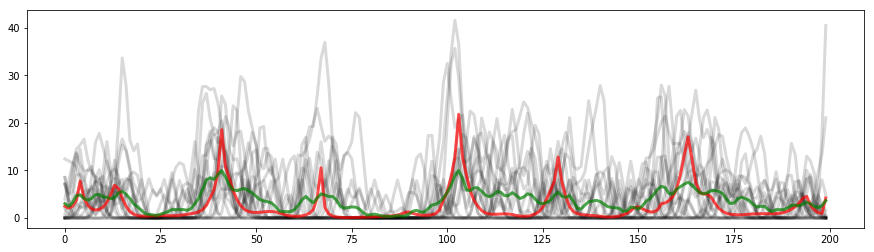

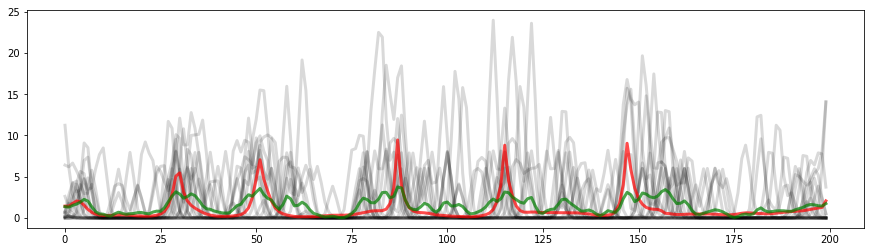

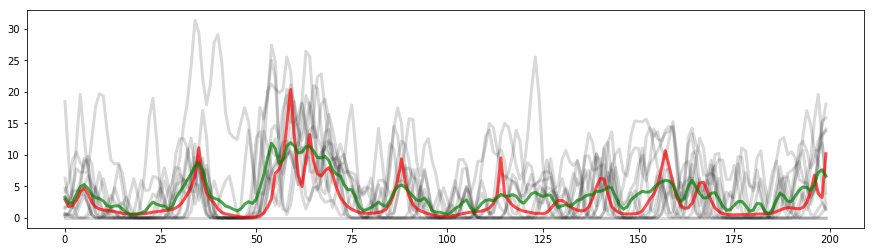

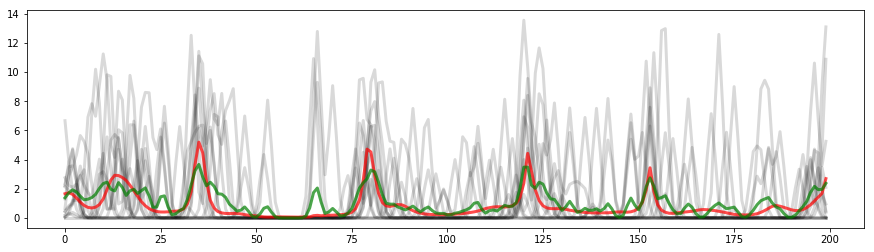

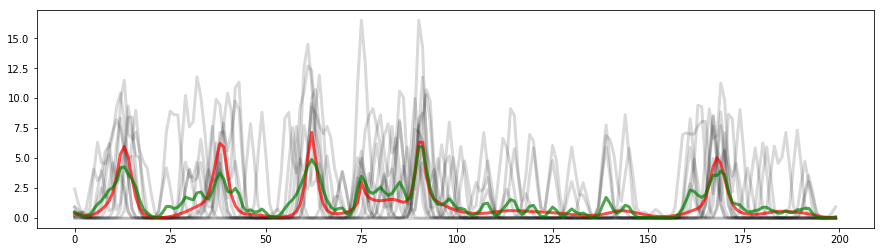

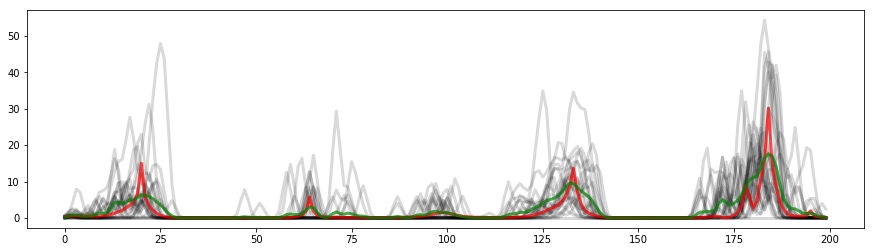

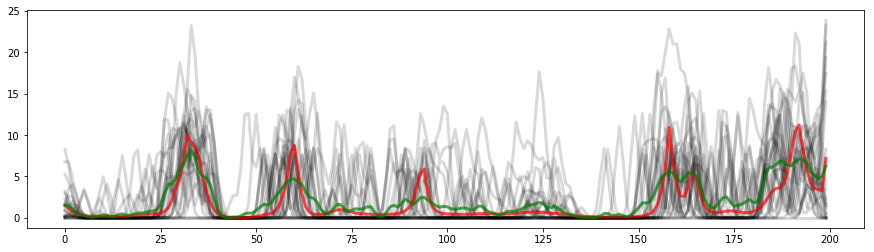

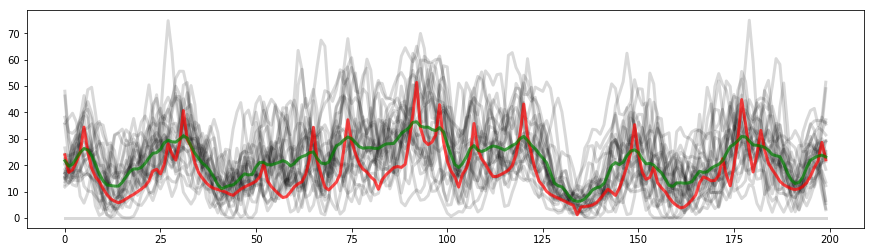

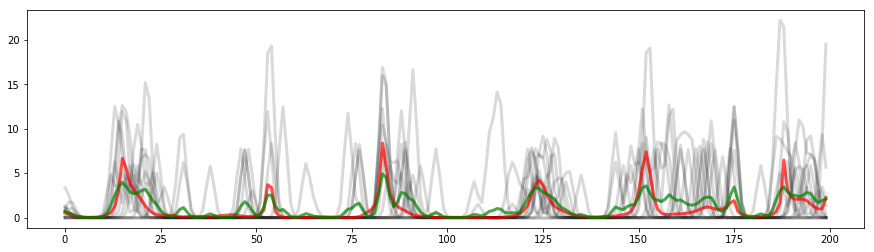

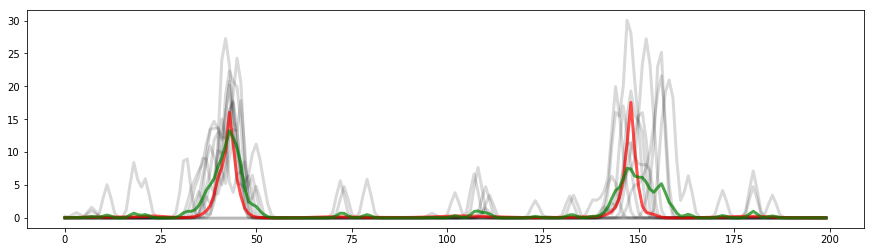

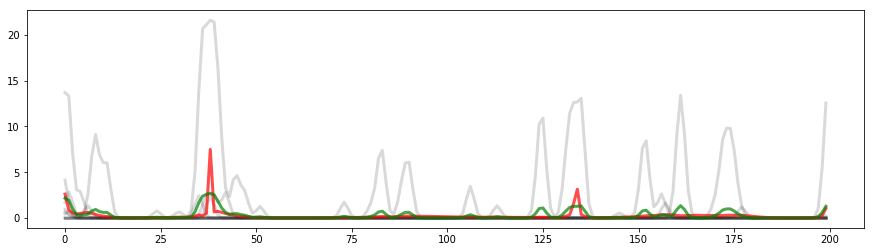

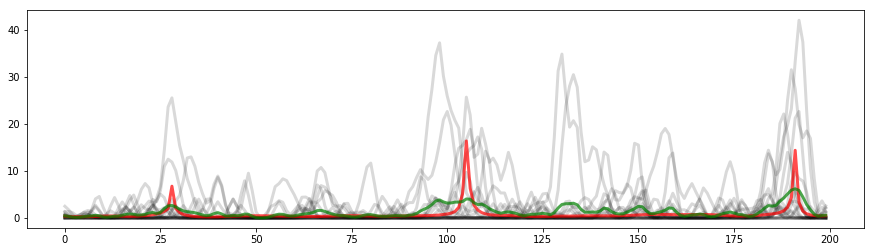

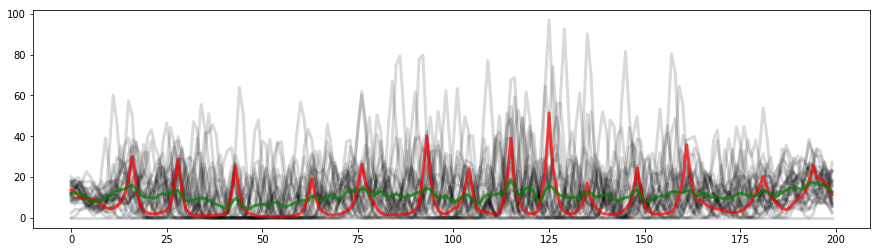

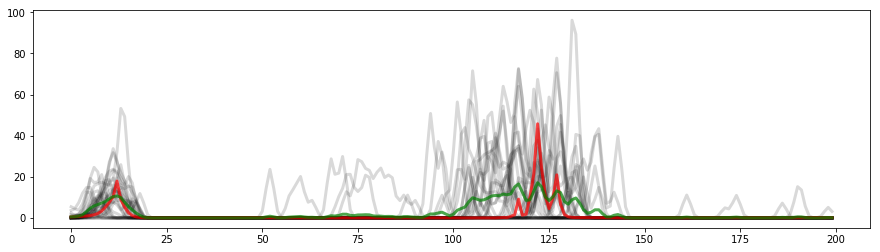

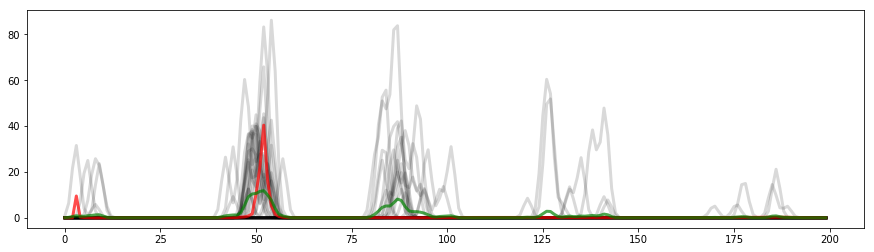

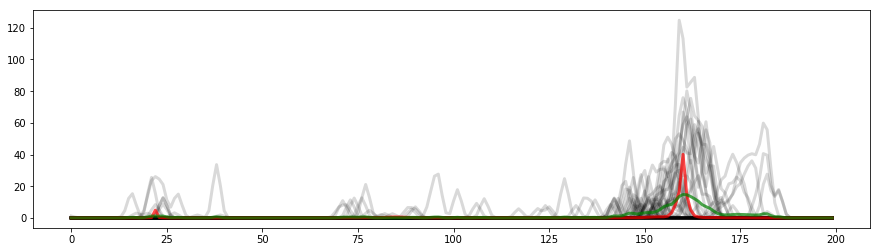

In [35]:
for i in range(len(frMats)):
    
    X = np.expand_dims(frMats[i],axis=2)
    #print(X.shape)
    binit = X.mean(axis=0)
    #print(barycenter_init.shape)
    Z = sdtw_barycenter(X, binit, gamma=10)
    
    figure(figsize=(15,4))
    for x in X:
        plot(x.ravel(), c="k", linewidth=3, alpha=0.15)
        
    plot(Z.ravel(), c="r", linewidth=3, alpha=0.7)
    plot(X.mean(axis=0),c='g',linewidth=3,alpha=.7)
    
    #subplot(121)
    #plot(X.mean(axis=0))
#     imshow(np.squeeze(spikeMats[i]),aspect='auto')
    #subplot(122)
#     imshow(np.squeeze(data['aligned_dat'][i]),aspect='auto')
    #plot(Z)
    

    